<h4><font color='#F55905'> <u>BUSINESS PROBLEM:</u></font><center><br><br><font color='#15657F'>Robust yield prediction of various farm processing units</font></center></h4>

A new fast food chain is seeing rapid expansion over the past couple of years. They
are now trying to optimize their supply chain to ensure that there are no shortages
of ingredients. For this, they’ve tasked their data science team to come up with a
model that could predict the output of each food processing farm over the next
few years. These predictions could further increase the efficiency of their current
supply chain management systems.

<h4><font color='#F55905'><u>MACHINE LEARNING PROBLEM:</u></font><center><br><br><font color='#15657F'>USE A REGRESSION MODEL TO PREDICT THE YIELD OF THE CROP FOR THE GIVEN TIMESTAMP </font></center></h4>

<h4><font color='#F55905'><u>ATTRIBUTE DESCRIPTION:</u></font></h4>


<h4><font color='#F55905'><u>Train data and Test data:</u></font></h4>
<table cellspacing="0" border="0">
  <tr>
    <td height="17" align="left">Farm id</td>
    <td align="left">Unique farm ids</td>
  </tr>
  <tr>
    <td height="17" align="left">Date</td>
    <td align="left">Dates per hour from 2016 in train and from 2017 in test </td>
  </tr>
  <tr>
    <td height="17" align="left">Ingredient_type</td>
    <td align="left">Type of ingredient in the farm : There are 4 types - w,x,y,z</td>
  </tr>
  </tr>
  <tr>
    <td height="17" align="left">Yield</td>
    <td align="left">Yield for each farm per hour</td>
  </tr>
</table>

<h4><font color='#F55905'><u>Farm Data</u></font></h4>
<table cellspacing="0" border="0">
  <tr>
    <td height="17" align="left">Farm id</td>
    <td align="left">Unique farm ids</td>
  </tr>
  <tr>
    <td height="17" align="left">operations_commencing_year</td>
    <td align="left">Year the farm has started</td>
  </tr>
  <tr>
    <td height="17" align="left">num_processing_plants</td>
    <td align="left">processing plants present in the location/ farm </td>
  </tr>
  <tr>
    <td height="17" align="left">farm_area</td>
    <td align="left">Area of the given farm</td>
  </tr>
  <tr>
    <td height="17" align="left">farming_company</td>
    <td align="left">The company that owns the farm</td>
  </tr>
  <tr>
    <td height="17" align="left">deidentified_location</td>
    <td align="left">Location of the farm</td>
  </tr>

  
</table>

<h4><font color='#F55905'><u>Train weather and Test weather</u></font></h4>
<table cellspacing="0" border="0">
  <tr>
    <td height="17" align="left">timestamp</td>
    <td align="left">Dates at which the weather was calculated at each hour</td>
  </tr>
  <tr>
    <td height="17" align="left">deidentified_location</td>
    <td align="left">Location of the farm</td>
  </tr>
  <tr>
    <td height="17" align="left">temp_obs</td>
    <td align="left">Temperature at that hour</td>
  </tr>
  <tr>
    <td height="17" align="left">cloudiness</td>
    <td align="left">Cloulds present in the sky at that hour</td>
  </tr>
  <tr>
    <td height="17" align="left">wind_direction</td>
    <td align="left">The direction of the wind at the hour</td>
  </tr>
  <tr>
    <td height="17" align="left">dew_temp</td>
    <td align="left">Dew temperature at the hour</td>
  </tr>
  <tr>
    <td height="17" align="left">pressure_sea_level</td>
    <td align="left">Pressure sea level at the hour</td>
  </tr>
  <tr>
    <td height="17" align="left">precipitation</td>
    <td align="left">Rainfall at the hour</td>
  </tr>
  <tr>
    <td height="17" align="left">wind_speed</td>
    <td align="left">Wind speed at that hour</td>
  </tr>


</table>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##train_data

In [0]:
train_data=pd.read_csv("/content/drive/My Drive/train_data.csv")
farm_data=pd.read_csv("/content/drive/My Drive/farm_data.csv")
train_weather=pd.read_csv("/content/drive/My Drive/train_weather.csv")

##Test_data

In [0]:
test_data=pd.read_csv("/content/drive/My Drive/test_data.csv")
test_weather=pd.read_csv("/content/drive/My Drive/test_weather.csv")

#Explore the data and engineer new features

##merging the datasets for visualization

In [0]:
farm_data.drop_duplicates(subset="farm_id",inplace=True)

In [0]:
data1=pd.merge(train_data,farm_data,on="farm_id")

In [0]:
data1.shape

(20216100, 9)

In [0]:
data2=pd.merge(data1,train_weather,how="left",left_on=["deidentified_location","date"],right_on=['deidentified_location',"timestamp"])

In [0]:
data2.shape

(20216100, 17)

In [0]:
data2["day"]=pd.DatetimeIndex(data2["date"]).day
data2["month"]=pd.DatetimeIndex(data2["date"]).month

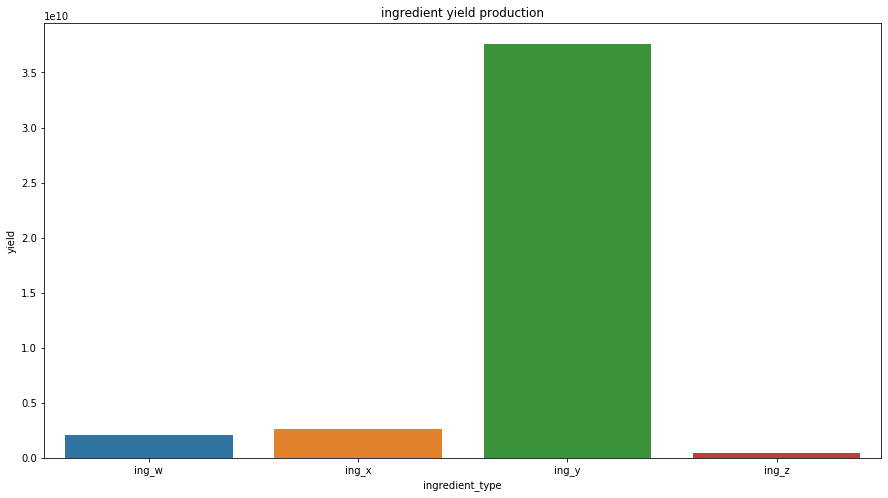

In [0]:
ing_yield=pd.DataFrame(data2.groupby("ingredient_type")["yield"].sum())
ing_yield=ing_yield.reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x="ingredient_type",y="yield",data=ing_yield)
plt.title("ingredient yield production")
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


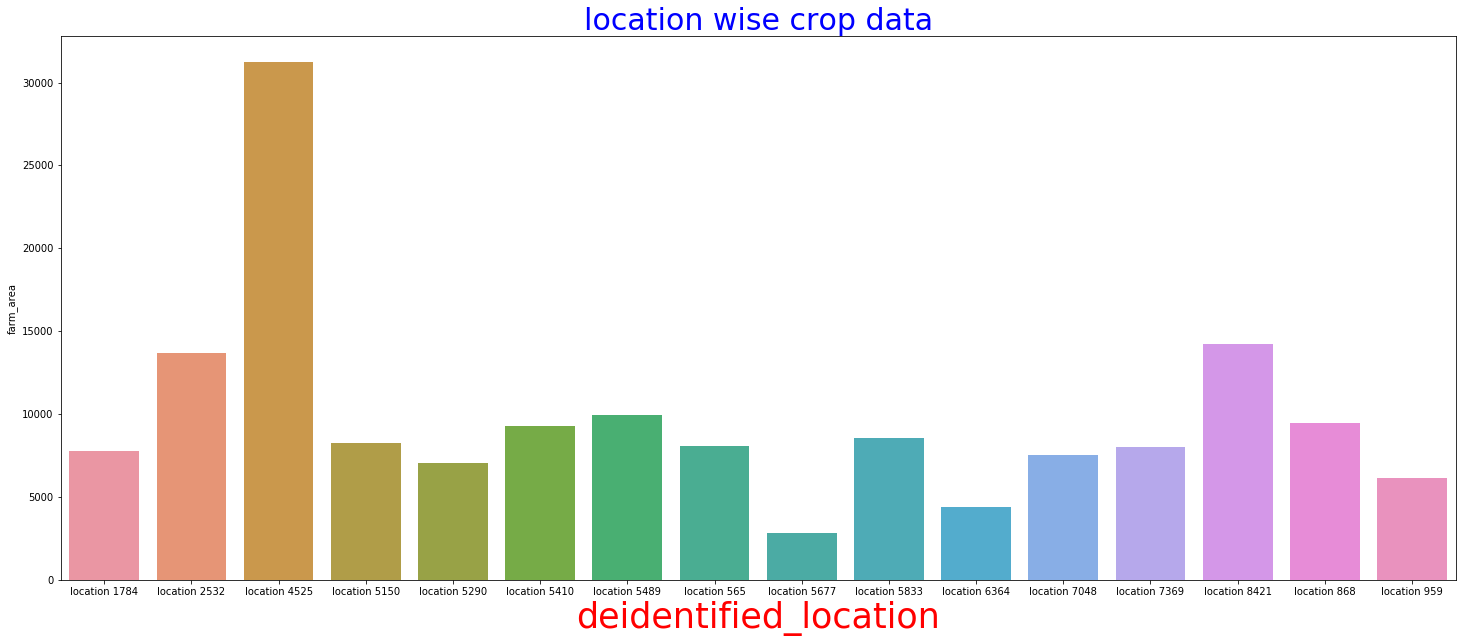

In [0]:
farmarea=pd.DataFrame(data2.groupby(["deidentified_location"])["farm_area"].mean())
farmarea=farmarea.reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x="deidentified_location",y="farm_area",data=farmarea)
plt.title("location wise crop data",fontsize=30,color = 'B')
plt.xlabel("deidentified_location",fontsize=35,color = 'r')
plt.show()

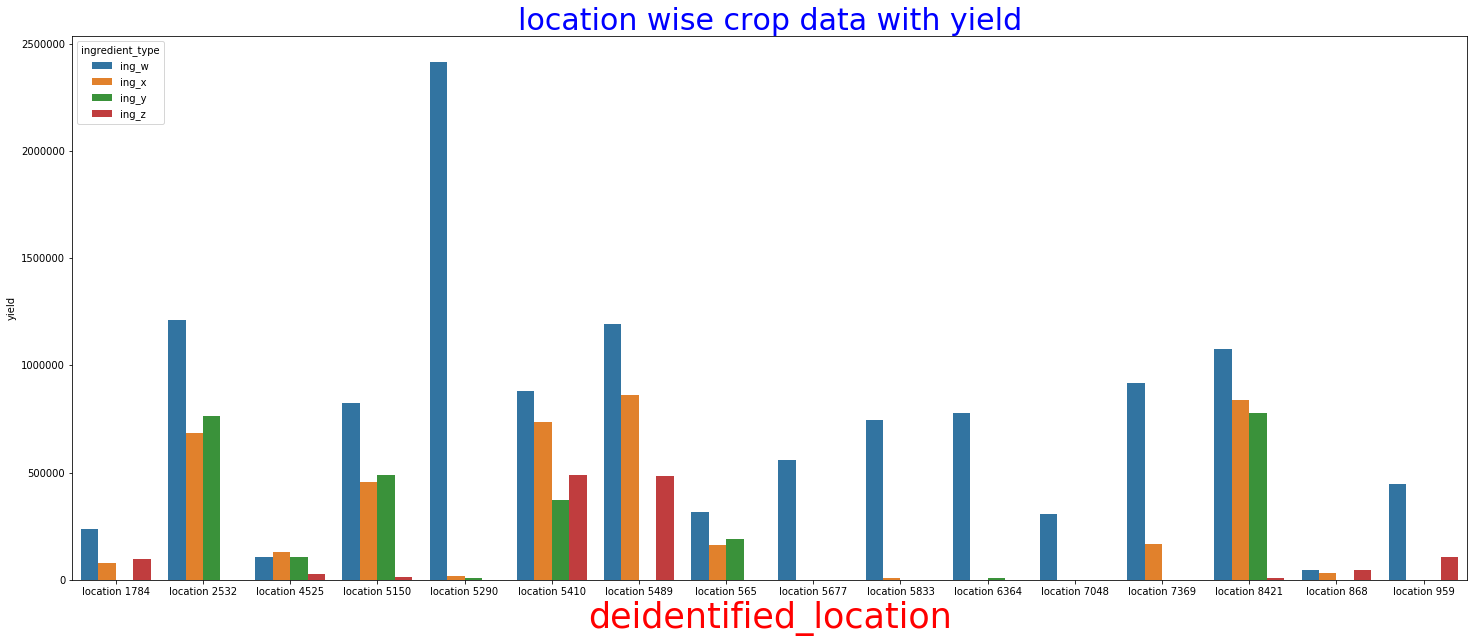

In [0]:
farmarea=pd.DataFrame(data2.groupby(["ingredient_type","deidentified_location"])["yield"].count())
farmarea=farmarea.reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x="deidentified_location",y="yield",data=farmarea,hue="ingredient_type",)
plt.title("location wise crop data with yield",fontsize=30,color = 'B')
plt.xlabel("deidentified_location",fontsize=35,color = 'r')
plt.show()

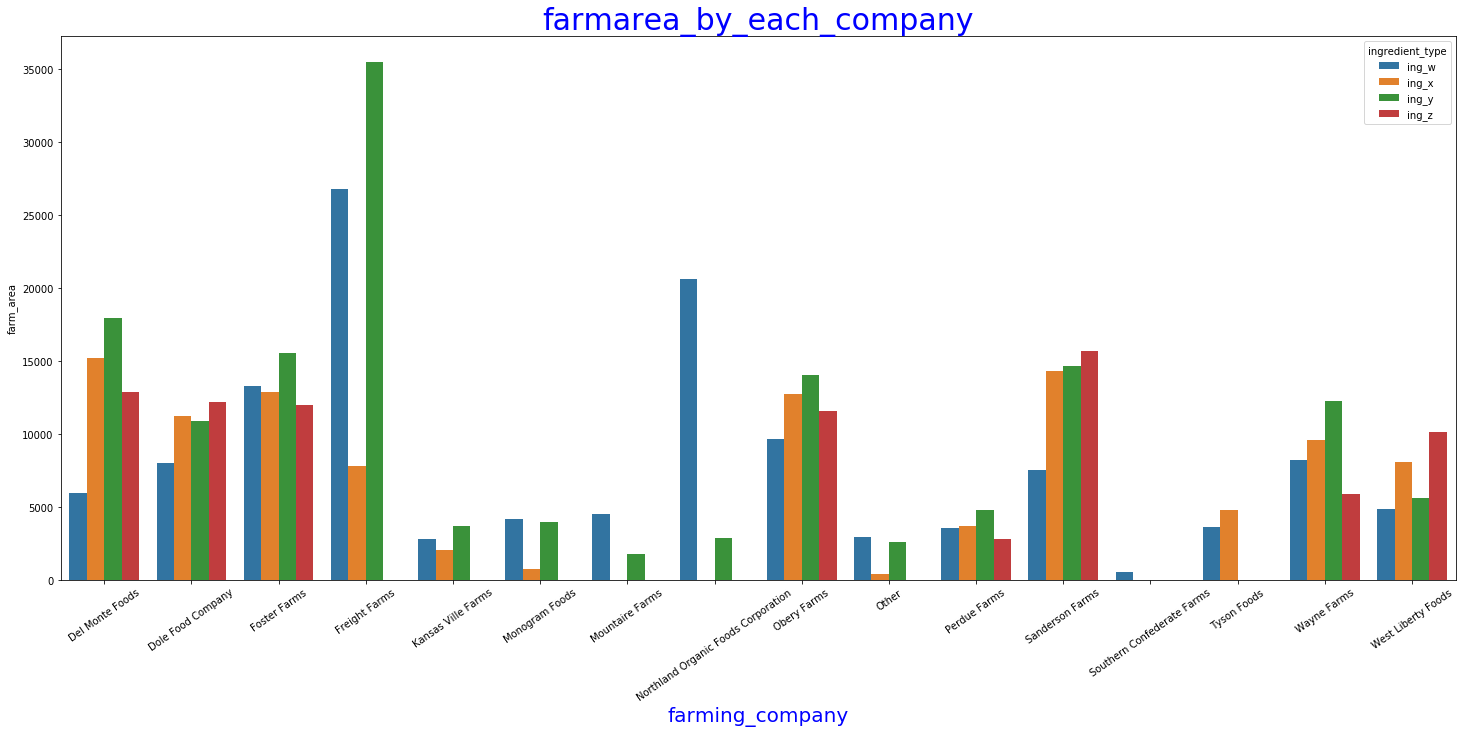

In [0]:
farmarea_by_each_company=pd.DataFrame(data2.groupby(["ingredient_type","farming_company"])["farm_area"].mean())
farmarea_by_each_company=farmarea_by_each_company.reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x="farming_company",y="farm_area",data=farmarea_by_each_company,hue="ingredient_type",saturation=0.75)
plt.title("farmarea_by_each_company",fontsize=30,color = 'B')
plt.xlabel("farming_company",fontsize=20,color = 'B')
plt.xticks(rotation=35)
plt.show()

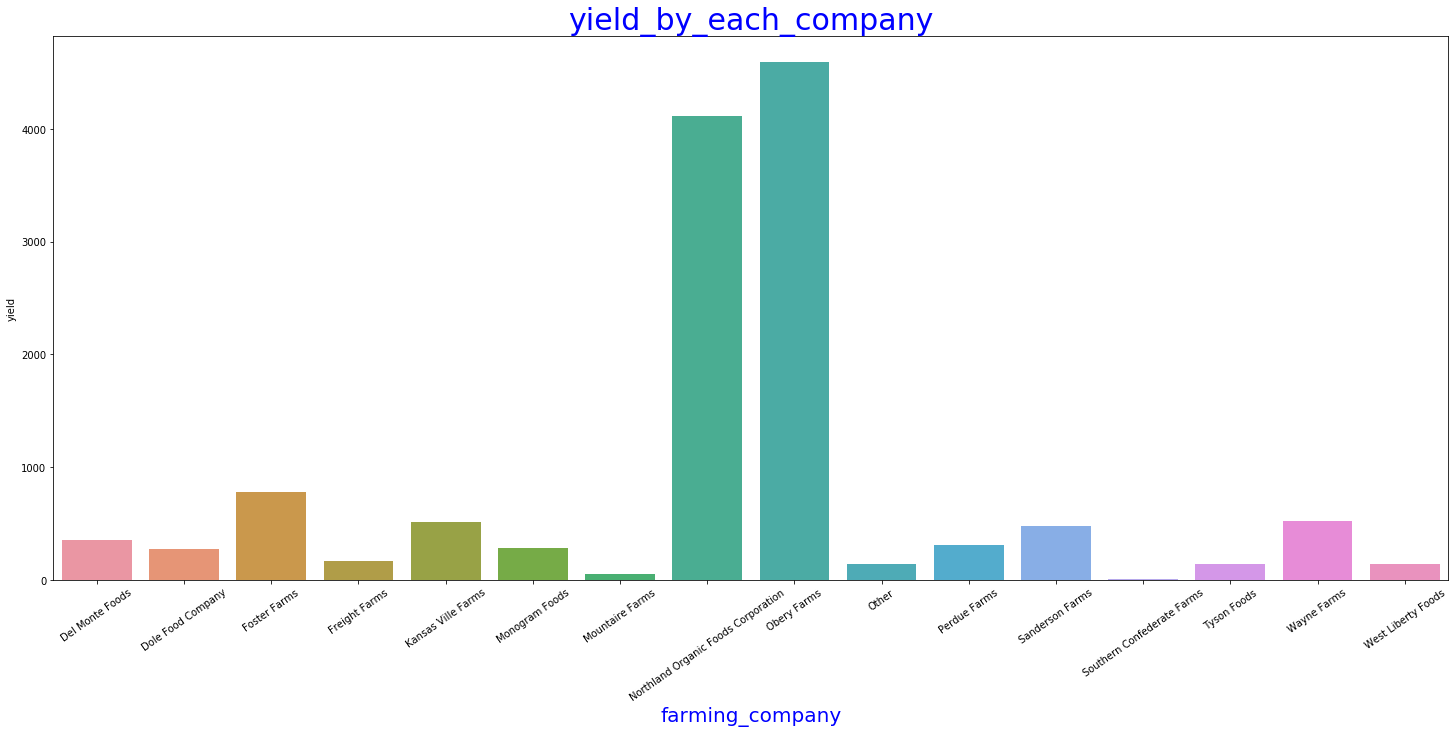

In [0]:
yield_by_each_company=pd.DataFrame(data2.groupby(["farming_company"])["yield"].mean())
yield_by_each_company=yield_by_each_company.reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x="farming_company",y="yield",data=yield_by_each_company,saturation=0.75)
plt.title("yield_by_each_company",fontsize=30,color = 'B')
plt.xlabel("farming_company",fontsize=20,color = 'B')
plt.xticks(rotation=35)
plt.show()

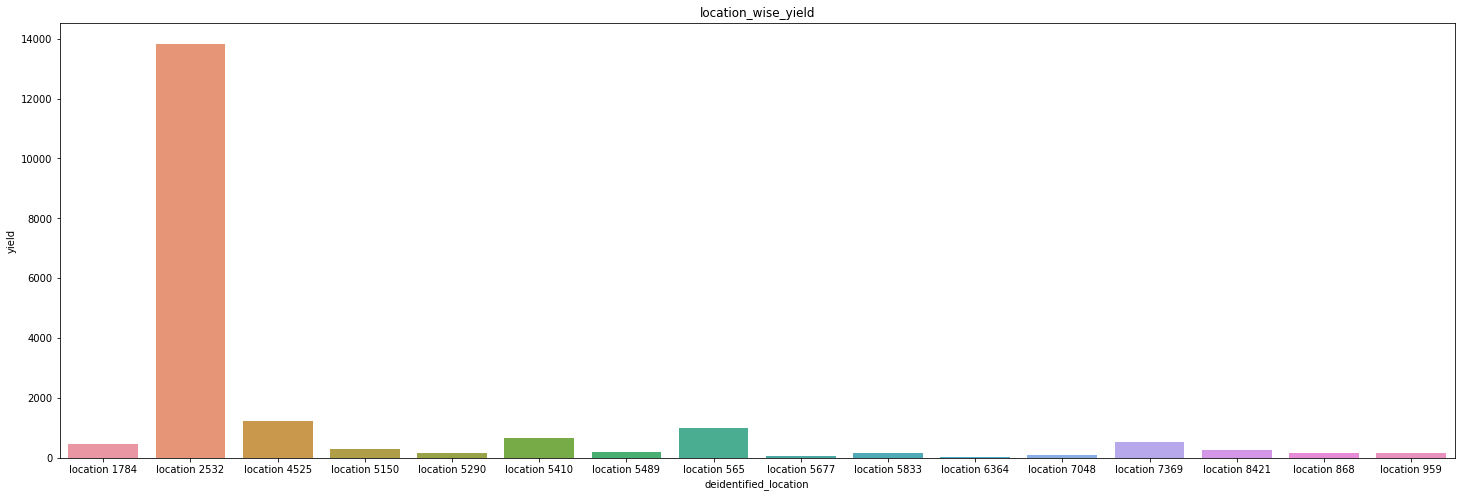

In [0]:
locationwise_yield=pd.DataFrame(data2.groupby("deidentified_location")["yield"].mean())
locationwise_yield=locationwise_yield.reset_index()
plt.figure(figsize=(25,8))
sns.barplot(x="deidentified_location",y="yield",data=locationwise_yield)
plt.title("location_wise_yield")
plt.show()

Text(0, 0.5, 'yield')

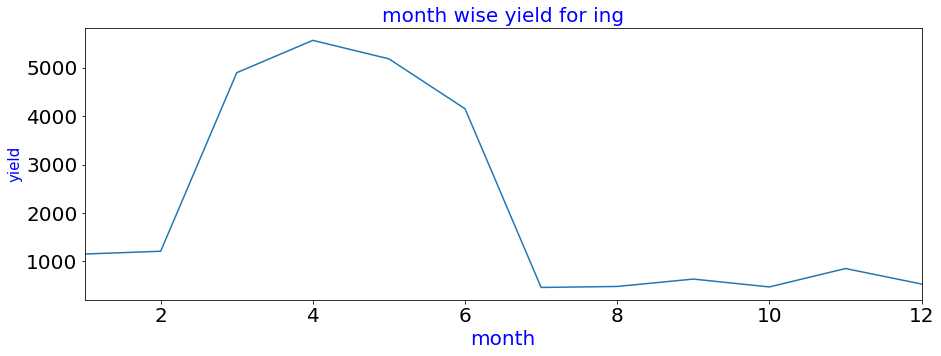

In [0]:
temp=data2.groupby(['month'])['yield'].mean()
temp.plot(figsize=(15,5), title= 'month wise yield for ing', fontsize=20)
plt.title('month wise yield for ing',fontsize=20,color = 'B')
plt.xlabel("month",fontsize=20,color = 'B')
plt.ylabel("yield",fontsize=15,color = 'B')

Text(0, 0.5, 'yield')

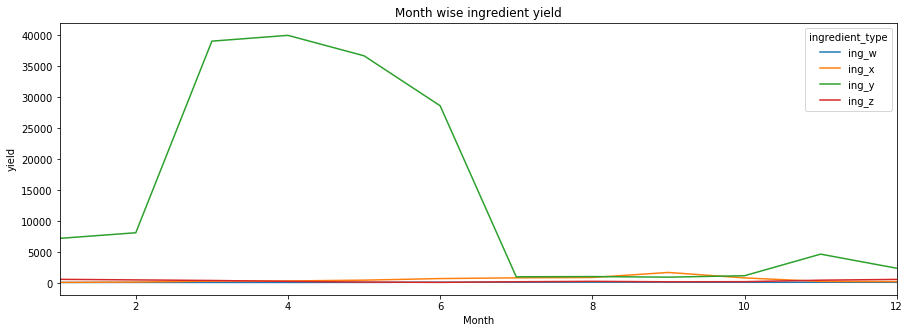

In [0]:
fig, ax = plt.subplots(figsize=(15,5))
data2.groupby(['month','ingredient_type']).mean()['yield'].unstack().plot(ax=ax)
# Add title and axis names
plt.title('Month wise ingredient yield')
plt.xlabel("Month")
plt.ylabel("yield")

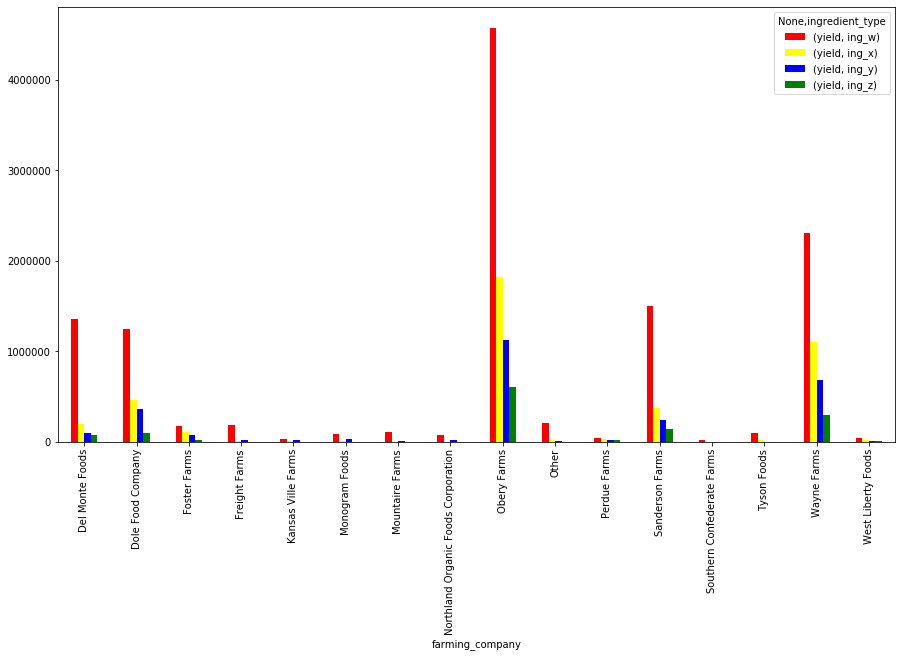

In [0]:
pd.DataFrame(data2.groupby(['farming_company','ingredient_type'])['yield'].count()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

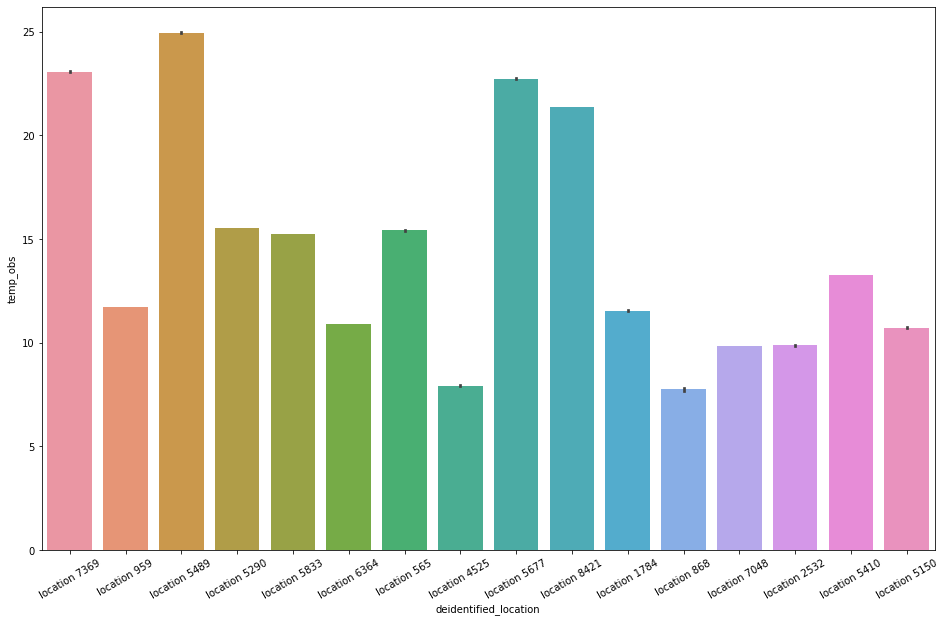

In [0]:
plt.figure(figsize = (16, 10))  
sns.barplot(y = "temp_obs", x = "deidentified_location", data = data2)
plt.xticks(rotation=30)

Text(0.5, 0, 'yield')

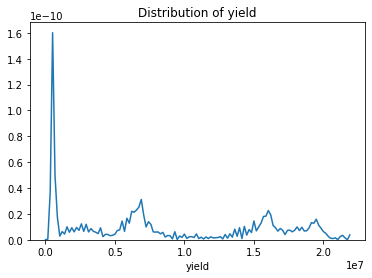

In [0]:
sns.kdeplot(data2['yield'].values).set_title("Distribution of yield")
plt.xlabel('yield')

(0, 1000)

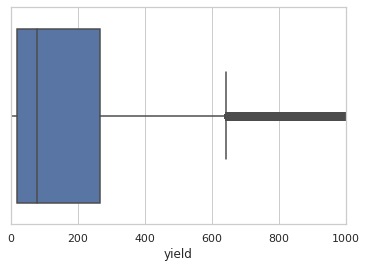

In [0]:

ax = sns.boxplot(x=data2["yield"])
plt.xlim(0,1000)

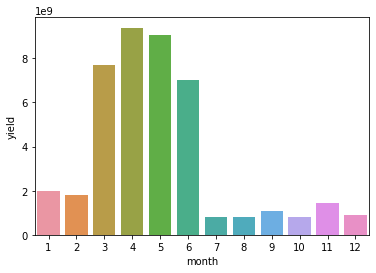

In [0]:
monthsyield=pd.DataFrame(data2.groupby("month")["yield"].sum())
monthsyield=monthsyield.reset_index()
sns.barplot(x="month", y="yield", data=monthsyield)

#Predict the yield for each farm during the given timestamps

##Droping the columns which are having 30% and more

In [0]:
#function for missing values in columns
def missing_coldata(df):
    missin_col = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,1), 
                              columns=['% of missing value'])
    missin_col['Count of Missing Values'] = df.isnull().sum()
    return missin_col

In [6]:
print(missing_coldata(train_data))
print(missing_coldata(farm_data))
print(missing_coldata(train_weather))

                 % of missing value  Count of Missing Values
yield                           0.0                        0
ingredient_type                 0.0                        0
farm_id                         0.0                        0
date                            0.0                        0
                            % of missing value  Count of Missing Values
num_processing_plants                     75.5                     1094
operations_commencing_year                53.4                      774
deidentified_location                      0.0                        0
farming_company                            0.0                        0
farm_area                                  0.0                        0
farm_id                                    0.0                        0
                       % of missing value  Count of Missing Values
cloudiness                           49.5                    69173
precipitation                        36.0                

In [7]:
print(missing_coldata(test_data))
print(missing_coldata(test_weather))

                 % of missing value  Count of Missing Values
id                              0.0                        0
ingredient_type                 0.0                        0
farm_id                         0.0                        0
date                            0.0                        0
                       % of missing value  Count of Missing Values
cloudiness                           49.7                    69065
precipitation                        34.4                    47788
pressure_sea_level                    7.8                    10883
wind_direction                        4.4                     6134
wind_speed                            0.2                      240
dew_temp                              0.1                      184
temp_obs                              0.0                       43
deidentified_location                 0.0                        0
timestamp                             0.0                        0


In [0]:
#train_weather
train_weather.drop(["cloudiness","precipitation"],axis=1,inplace=True)

#farm_data
farm_data.drop(["num_processing_plants","operations_commencing_year"],axis=1,inplace=True)

In [0]:
#test_weather
test_weather.drop(["cloudiness","precipitation"],axis=1,inplace=True)

In [10]:
test_weather.columns

Index(['timestamp', 'deidentified_location', 'temp_obs', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'wind_speed'],
      dtype='object')

In [11]:
train_data.columns

Index(['date', 'farm_id', 'ingredient_type', 'yield'], dtype='object')

###checking the rows which are having Duplicates and Droping them

In [12]:
train_data[train_data.duplicated(subset=["date","ingredient_type","farm_id"])].shape

(135568, 4)

In [13]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type']).head()

,date,farm_id,ingredient_type,yield
1483,2016-01-01 00:00:00,fid_122174,ing_w,69.517
1598,2016-01-01 00:00:00,fid_122174,ing_w,39.519
695,2016-01-01 00:00:00,fid_18990,ing_w,129.790
747,2016-01-01 00:00:00,fid_18990,ing_w,354.413
669,2016-01-01 00:00:00,fid_26064,ing_w,7.770


In [0]:
a=train_data.groupby(["date","ingredient_type","farm_id"])["yield"].sum()

In [0]:
a=pd.DataFrame(a)

In [0]:
train_data.set_index(["date","ingredient_type","farm_id"],inplace=True)

In [0]:
train_data.update(a,overwrite=True)

In [0]:
train_data.reset_index(inplace=True)

In [0]:
train_data.drop_duplicates(inplace=True)

In [20]:
train_data.shape

(20080532, 4)

In [21]:
farm_data[farm_data.duplicated(subset="farm_id")].shape

(15, 4)

In [0]:
#farm_data
farm_data= farm_data.groupby('farm_id', group_keys=False).apply(lambda x: x.loc[x.farm_area.idxmax()])

In [0]:
farm_data.head()

,farm_id,farm_area,farming_company,deidentified_location
farm_id,,,,
fid_100053,fid_100053,2043.866000,Del Monte Foods,location 5290
fid_100107,fid_100107,35416.574563,Del Monte Foods,location 2532
fid_100135,fid_100135,1432.564260,Dole Food Company,location 5290
fid_100249,fid_100249,941.571905,Wayne Farms,location 5489
fid_100303,fid_100303,3716.120000,Wayne Farms,location 5290


In [0]:
farm_data.reset_index(drop=True,inplace=True)

In [0]:
train_data.shape

(20080532, 4)

In [0]:
farm_data.shape

(1434, 4)

##checking the NaN's and imputing them

In [0]:
print(missing_coldata(train_data))
print(missing_coldata(farm_data))
print(missing_coldata(train_weather))

                 % of missing value  Count of Missing Values
yield                           0.0                        0
farm_id                         0.0                        0
ingredient_type                 0.0                        0
date                            0.0                        0
                       % of missing value  Count of Missing Values
deidentified_location                 0.0                        0
farming_company                       0.0                        0
farm_area                             0.0                        0
farm_id                               0.0                        0
                       % of missing value  Count of Missing Values
pressure_sea_level                    7.6                    10618
wind_direction                        4.5                     6268
wind_speed                            0.2                      304
dew_temp                              0.1                      113
temp_obs                 

In [0]:
numcol=['temp_obs','wind_direction','dew_temp',
       'pressure_sea_level','wind_speed']

In [0]:
train_weather[numcol]=train_weather[numcol].interpolate(method="linear",limit_direction="both")

##test data

In [0]:
print(missing_coldata(test_data))
print(missing_coldata(test_weather))

                 % of missing value  Count of Missing Values
id                              0.0                        0
ingredient_type                 0.0                        0
farm_id                         0.0                        0
date                            0.0                        0
                       % of missing value  Count of Missing Values
pressure_sea_level                    7.8                    10883
wind_direction                        4.4                     6134
wind_speed                            0.2                      240
dew_temp                              0.1                      184
temp_obs                              0.0                       43
deidentified_location                 0.0                        0
timestamp                             0.0                        0


In [0]:
numcol2=['temp_obs','wind_direction','dew_temp',
       'pressure_sea_level','wind_speed']

In [0]:
test_weather[numcol2]=test_weather[numcol2].interpolate(method="linear",limit_direction="both")

##Merging the train data

In [0]:
data=pd.merge(train_data,farm_data,on="farm_id")

In [0]:
train_weather.rename({'timestamp':"date"},axis=1,inplace=True)

In [0]:
train_weather.head()

,date,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,0.0,20.0,1019.7,0.0
1,2016-01-01 01:00:00,location 7369,24.4,70.0,21.1,1020.2,1.5
2,2016-01-01 02:00:00,location 7369,22.8,0.0,21.1,1020.2,0.0
3,2016-01-01 03:00:00,location 7369,21.1,0.0,20.6,1020.1,0.0
4,2016-01-01 04:00:00,location 7369,20.0,250.0,20.0,1020.0,2.6


In [0]:
final_data1=pd.merge(data,train_weather,how="left",on=["deidentified_location","date"])

In [0]:
final_data1.shape

(20080532, 12)

In [0]:
final_data1.isnull().sum()

date                         0
ingredient_type              0
farm_id                      0
yield                        0
farm_area                    0
farming_company              0
deidentified_location        0
temp_obs                 89921
wind_direction           89921
dew_temp                 89921
pressure_sea_level       89921
wind_speed               89921
dtype: int64

In [0]:
numcol3=['temp_obs','wind_direction','dew_temp',
       'pressure_sea_level','wind_speed']

In [0]:
final_data1[numcol3]=final_data1[numcol3].interpolate(method="linear",limit_direction="both")

In [0]:
final_data1.isnull().sum()

date                     0
ingredient_type          0
farm_id                  0
yield                    0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
wind_speed               0
dtype: int64

##Merging the test data

In [0]:
data1=pd.merge(test_data,farm_data,on="farm_id")

In [0]:
data1.shape

(20848800, 7)

In [0]:
test_weather.rename({'timestamp':"date"},axis=1,inplace=True)

In [0]:
test_weather.head()

,date,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed
0,2017-01-01 00:00:00,location 7369,17.8,100.0,11.7,1021.4,3.6
1,2017-01-01 01:00:00,location 7369,17.8,130.0,12.8,1022.0,3.1
2,2017-01-01 02:00:00,location 7369,16.1,140.0,12.8,1021.9,3.1
3,2017-01-01 03:00:00,location 7369,17.2,140.0,13.3,1022.2,3.1
4,2017-01-01 04:00:00,location 7369,16.7,130.0,13.3,1022.3,2.6


In [0]:
f_test_data1=pd.merge(data1,test_weather,how="left",on=["deidentified_location","date"])

In [0]:
f_test_data1.shape

(20848800, 12)

In [0]:
f_test_data1.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
temp_obs                 96155
wind_direction           96155
dew_temp                 96155
pressure_sea_level       96155
wind_speed               96155
dtype: int64

In [0]:
numcol4=['temp_obs','wind_direction','dew_temp',
       'pressure_sea_level','wind_speed']

In [0]:
f_test_data1[numcol4]=f_test_data1[numcol4].interpolate(method="linear",limit_direction="both")

In [0]:
f_test_data1.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
id                       0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
wind_speed               0
dtype: int64

##Excrating day,month and hour form date and time

In [0]:
final_data1["day"]=pd.DatetimeIndex(final_data1["date"]).day
final_data1["month"]=pd.DatetimeIndex(final_data1["date"]).month
final_data1["hour"]=pd.DatetimeIndex(final_data1["date"]).hour
final_data1["quarter"]=pd.DatetimeIndex(final_data1["date"]).quarter

In [0]:
final_data1["quarter"].unique()

array([1, 2, 3, 4])

In [0]:
f_test_data1["day"]=pd.DatetimeIndex(f_test_data1["date"]).day
f_test_data1["month"]=pd.DatetimeIndex(f_test_data1["date"]).month
f_test_data1["hour"]=pd.DatetimeIndex(f_test_data1["date"]).hour
f_test_data1["quarter"]=pd.DatetimeIndex(f_test_data1["date"]).quarter

In [0]:
f_test_data1["quarter"].unique()

array([1, 2, 3, 4])

In [0]:
final_data1.to_pickle("/content/drive/My Drive/final_data1.pickle")

In [0]:
f_test_data1.to_pickle("/content/drive/My Drive/f_test_data1.pickle")

In [0]:
final_data1=pd.read_pickle("/content/drive/My Drive/final_data1.pickle")

In [0]:
f_test_data1=pd.read_pickle("/content/drive/My Drive/f_test_data1.pickle")

## Droping the date and timestamp 

In [0]:
final_data1.drop(["date"],axis=1,inplace=True)

In [0]:
f_test_data1.drop(["date"],axis=1,inplace=True)

In [7]:
final_data1.shape

(20080532, 15)

In [8]:
final_data1.head()

,ingredient_type,farm_id,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,day,month,hour,quarter
0,ing_w,fid_110884,0.0,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,1,1,0,1
1,ing_w,fid_110884,0.0,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,1.5,1,1,1,1
2,ing_w,fid_110884,0.0,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,1,1,2,1
3,ing_w,fid_110884,0.0,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,1,1,3,1
4,ing_w,fid_110884,0.0,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,2.6,1,1,4,1


In [9]:
f_test_data1.shape

(20848800, 15)

##Data type converction for the data sets

In [0]:
cat_cols=['farm_id', 'ingredient_type','farming_company', 'deidentified_location', 'month', 'day','hour']

In [0]:
num_cols=final_data1.columns.difference(cat_cols)

In [0]:
final_data1[cat_cols]=final_data1[cat_cols].apply(lambda x:x.astype("category"))
final_data1[num_cols]=final_data1[num_cols].apply(lambda x:x.astype("float"))

In [0]:
cat_col=['farm_id', 'ingredient_type','farming_company', 'deidentified_location', 'month', 'day','hour']

In [0]:
num_cols=f_test_data1.columns.difference(cat_col)

In [15]:
num_cols

Index(['dew_temp', 'farm_area', 'id', 'pressure_sea_level', 'quarter',
       'temp_obs', 'wind_direction', 'wind_speed'],
      dtype='object')

In [0]:
f_test_data1[cat_cols]=f_test_data1[cat_cols].apply(lambda x:x.astype("category"))
f_test_data1[num_cols]=f_test_data1[num_cols].apply(lambda x:x.astype("float"))

In [17]:
final_data1.dtypes

ingredient_type          category
farm_id                  category
yield                     float64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
wind_speed                float64
day                      category
month                    category
hour                     category
quarter                   float64
dtype: object

In [18]:
f_test_data1.dtypes

farm_id                  category
ingredient_type          category
id                        float64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
wind_speed                float64
day                      category
month                    category
hour                     category
quarter                   float64
dtype: object

##label encoding for the categorical columns

In [0]:
from sklearn import preprocessing

In [21]:
# label_encoder object knows how to understand word labels.

label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()

# Encode labels in column target.

label_encoder1.fit(final_data1['farming_company'])
label_encoder2.fit(final_data1['deidentified_location'])
label_encoder3.fit(final_data1['farm_id'])


LabelEncoder()

In [0]:
final_data1['farming_company']=label_encoder1.transform(final_data1['farming_company'])
final_data1['deidentified_location'] = label_encoder2.transform(final_data1['deidentified_location'])
final_data1['farm_id'] = label_encoder3.transform(final_data1['farm_id'])


In [0]:
f_test_data1['farming_company']=label_encoder1.transform(f_test_data1['farming_company'])
f_test_data1['deidentified_location'] = label_encoder2.transform(f_test_data1['deidentified_location'])
f_test_data1['farm_id'] = label_encoder3.transform(f_test_data1['farm_id'])


In [24]:
f_test_data1.columns

Index(['farm_id', 'ingredient_type', 'id', 'farm_area', 'farming_company',
       'deidentified_location', 'temp_obs', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'wind_speed', 'day', 'month', 'hour', 'quarter'],
      dtype='object')

##Dummification


In [0]:
cat_cols2=["ingredient_type"]

In [0]:
#creating Dummies for categorical columns
final_data1=pd.get_dummies(final_data1,columns=cat_cols2)

In [0]:
#creating Dummies for categorical columns
f_test_data1=pd.get_dummies(f_test_data1,columns=cat_cols2)

In [28]:
final_data1.dtypes

farm_id                     int64
yield                     float64
farm_area                 float64
farming_company             int64
deidentified_location       int64
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
wind_speed                float64
day                      category
month                    category
hour                     category
quarter                   float64
ingredient_type_ing_w       uint8
ingredient_type_ing_x       uint8
ingredient_type_ing_y       uint8
ingredient_type_ing_z       uint8
dtype: object

In [29]:
f_test_data1.dtypes

farm_id                     int64
id                        float64
farm_area                 float64
farming_company             int64
deidentified_location       int64
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
wind_speed                float64
day                      category
month                    category
hour                     category
quarter                   float64
ingredient_type_ing_w       uint8
ingredient_type_ing_x       uint8
ingredient_type_ing_y       uint8
ingredient_type_ing_z       uint8
dtype: object

In [30]:
final_data1.head(1)

,farm_id,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,day,month,hour,quarter,ingredient_type_ing_w,ingredient_type_ing_x,ingredient_type_ing_y,ingredient_type_ing_z
0,142,0.0,690.455096,8,12,25.0,0.0,20.0,1019.7,0.0,1,1,0,1.0,1,0,0,0


In [31]:

f_test_data1.head(1)

,farm_id,id,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,day,month,hour,quarter,ingredient_type_ing_w,ingredient_type_ing_x,ingredient_type_ing_y,ingredient_type_ing_z
0,142,0.0,690.455096,8,12,17.8,100.0,11.7,1021.4,3.6,1,1,0,1.0,1,0,0,0


In [32]:
final_data1.shape

(20080532, 18)

In [0]:
from sklearn.model_selection import train_test_split
X = final_data1.drop('yield',axis = 1)
y = final_data1['yield']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

##.Multiple Linear regression

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# function for calculating the rmse and mape
import numpy as np
from sklearn import metrics
def rmse(train_actual,train_prediction,test_actual,test_prediction):
    print('train')
    print('rmse: ',np.sqrt(metrics.mean_squared_error(train_actual, train_prediction)))
    
    print('val')
    print('rmse: ',np.sqrt(metrics.mean_squared_error(test_actual, test_prediction)))

In [174]:
rmse(y_train,lin_regressor.predict(X_train),y_val,lin_regressor.predict(X_val))

train
rmse:  152808.44868423959
val
rmse:  156827.9920920721


##Removing the outliers from the target variable

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(final_data1["yield"]))
print(z)

In [0]:

final_data1= final_data1[(z < 1.96)]


In [124]:
f_test_data1.shape

(20848800, 18)

##Model Building 

In [0]:
from sklearn.model_selection import train_test_split
X = final_data1.drop('yield',axis = 1)
y = final_data1['yield']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

#### 1.Multiple Linear regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
rmse(y_train,lin_regressor.predict(X_train),y_val,lin_regressor.predict(X_val))

train
rmse:  2286.9911581254582
mape:  inf
val
rmse:  2272.8164595634207
mape:  inf


#### 2.Decision Tree regression

In [127]:
%%time
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=30)
dt.fit(X_train,y_train)

CPU times: user 6min 5s, sys: 2.77 s, total: 6min 8s
Wall time: 6min 8s


In [128]:
rmse(y_train,dt.predict(X_train),y_val,dt.predict(X_val))

train
rmse:  641.4076862212274
val
rmse:  857.1707257981327


In [0]:
submission=pd.read_csv("/content/drive/My Drive/sample_submission1-1578562773139 (2).csv")

([845667.8706226303,
  728891.7679936994,
  691439.9344225933,
  672312.3408923222,
  677090.8185663652,
  676560.9126369329,
  654263.5997861868,
  632135.5221067528,
  640213.0841161252,
  647647.8682593363],
 [1600346.4643150312,
  1389588.2841890634,
  1415398.8062994925,
  1423175.160064784,
  1385560.219829506,
  1407043.3186208461,
  1332500.331690167,
  1286215.1336578007,
  1220156.0275229055,
  1272492.375730626])

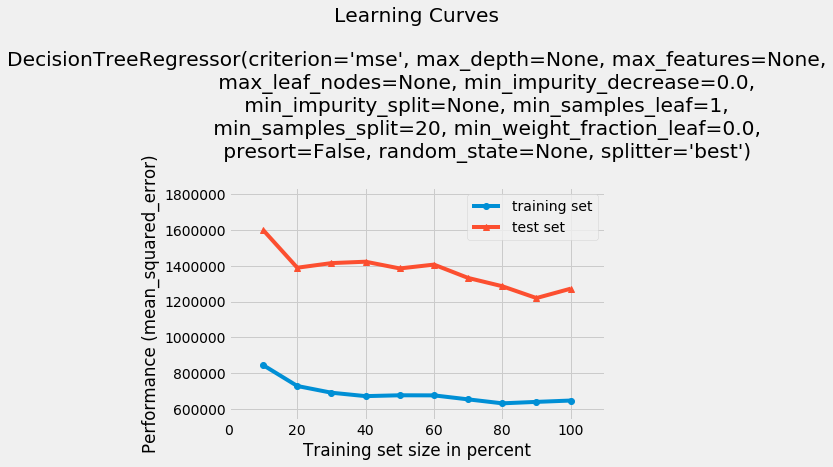

In [0]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_val, y_val, dt, scoring='mean_squared_error')

##RandomForestRegressor

In [0]:
%%time
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(min_samples_split=100,n_jobs=-1)
rfr.fit(X_train,y_train)

CPU times: user 13h 38min 2s, sys: 2min 7s, total: 13h 40min 9s
Wall time: 23min


In [0]:
rmse(y_train,rfr.predict(X_train),y_val,rfr.predict(X_val))

train
rmse:  821.9888306675102
val
rmse:  869.6967807242852


([1192690.3971363287,
  986086.8187584884,
  950162.0890356384,
  906478.1092588395,
  881656.583598833,
  842806.3738348891,
  773647.211536037,
  726864.0875127085,
  709221.1992574725,
  675705.5735433752],
 [1345529.4861878923,
  1182673.1328276428,
  1063298.5298229628,
  1000836.3215903015,
  960544.2644230678,
  917631.6180617121,
  869970.638548587,
  831226.9120781227,
  804943.8530516464,
  755467.5602495364])

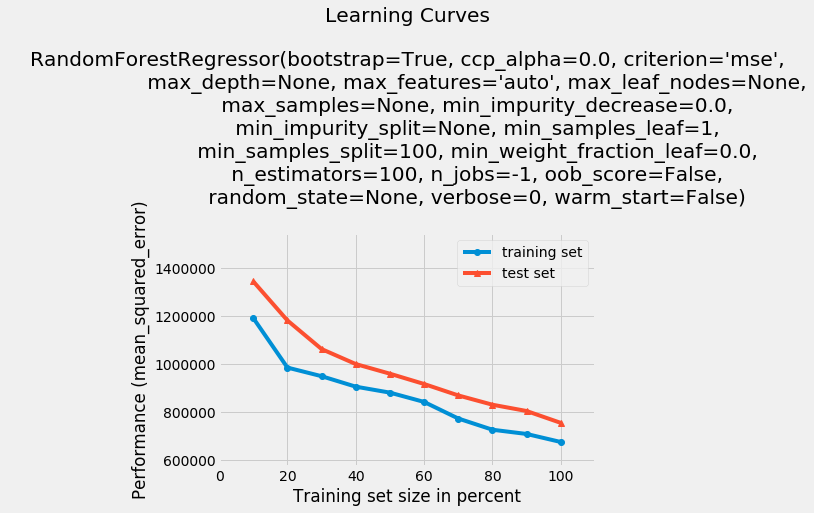

In [0]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_val, y_val, rfr, scoring='mean_squared_error')

In [0]:
f_test_data1.sort_values("id",inplace=True)

In [0]:
f_test_data2=f_test_data1.drop("id",axis=1)

In [0]:
output=pd.DataFrame({'id':f_test_data1["id"],'yield':dt.predict(f_test_data2)})

In [132]:
output.tail()

,id,yield
13210078,41696845.0,0.000000
13210079,41696846.0,313.259000
13236357,41696847.0,228.750000
13236358,41696848.0,1.062375
13236359,41696849.0,170.244200


In [0]:
sub1=pd.merge(output,submission,how="inner",on="id")

In [0]:
sub1.head()

,id,yield_x,yield_y
0,1.0,0.0,0
1,2.0,0.0,0
2,3.0,0.0,0
3,4.0,0.0,0
4,5.0,0.0,0


In [0]:
sub1.drop("yield_y",axis=1,inplace=True)

In [0]:
sub1.head(100)

,id,yield_x
0,1.0,0.000000
1,2.0,0.000000
2,3.0,0.000000
3,4.0,0.000000
4,5.0,0.000000
...,...,...
95,96.0,0.000000
96,97.0,0.000000
97,98.0,0.000000
98,99.0,135.517347


In [0]:
output.to_csv( '/content/drive/My Drive/solution1_vinod.csv',index=False)

In [0]:
dt.feature_importances_

array([0.14683891, 0.07052305, 0.03251603, 0.02443516, 0.12102042,
       0.33232109, 0.04320647, 0.07418031, 0.00243755, 0.03010379,
       0.01077406, 0.00195695, 0.00930084, 0.05214324, 0.02501421,
       0.02322792])

In [0]:
imp=pd.DataFrame(rfr.feature_importances_,index=X_train.columns)

In [0]:
imp.sort_values(by=0,ascending=False)

,0
farm_area,0.250698
farming_company,0.207955
ingredient_type_ing_y,0.128733
temp_obs,0.081042
farm_id,0.065660
day,0.054179
month,0.049655
dew_temp,0.044043
deidentified_location,0.043228
pressure_sea_level,0.020362


In [0]:
imp=imp[imp[0]<0.012413]

In [0]:
imp

,0
wind_direction,0.009893
wind_speed,0.005276
hour,0.010923
quarter,0.011490
ingredient_type_ing_x,0.004452


In [0]:
imp=pd.array(imp.index)

In [0]:
X_train.drop(imp,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X_val.drop(imp,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X_val.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'dew_temp', 'pressure_sea_level', 'day', 'month',
       'ingredient_type_ing_y', 'ingredient_type_ing_z'],
      dtype='object')

In [0]:
X_train.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'dew_temp', 'pressure_sea_level', 'day', 'month',
       'ingredient_type_ing_y', 'ingredient_type_ing_z'],
      dtype='object')

#GradientBoostingRegressor

In [0]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor()
gbm.fit(X=X_train, y=y_train)

CPU times: user 1h 4min 42s, sys: 2.32 s, total: 1h 4min 44s
Wall time: 1h 4min 45s


In [0]:
rmse(y_train,gbm.predict(X_train),y_val,gbm.predict(X_val))

train
rmse:  1613.115484136476
val
rmse:  1598.591766831


#Question no 3:
Given the forecasted demand for the next few months for a particular ingredient, device a strategy to source it

In [0]:
sol=pd.read_csv("/content/drive/My Drive/solution1_vinod.csv")

In [136]:
sol.tail()

,id,yield
20848795,41696845.0,0.000000
20848796,41696846.0,313.259000
20848797,41696847.0,228.750000
20848798,41696848.0,1.062375
20848799,41696849.0,170.244200


In [0]:
testwithtarget = pd.concat([f_test_data1, pd.DataFrame(sol,columns=['yield'])],axis =1 )

In [138]:
testwithtarget.head()

,farm_id,id,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,day,month,hour,quarter,ingredient_type_ing_w,ingredient_type_ing_x,ingredient_type_ing_y,ingredient_type_ing_z,yield
0,142,0.0,690.455096,8,12,17.8,100.0,11.7,1021.4,3.6,1,1,0,1.0,1,0,0,0,0.0
1,142,129.0,690.455096,8,12,17.8,130.0,12.8,1022.0,3.1,1,1,1,1.0,1,0,0,0,0.0
2,142,258.0,690.455096,8,12,16.1,140.0,12.8,1021.9,3.1,1,1,2,1.0,1,0,0,0,0.0
3,142,387.0,690.455096,8,12,17.2,140.0,13.3,1022.2,3.1,1,1,3,1.0,1,0,0,0,0.0
4,142,516.0,690.455096,8,12,16.7,130.0,13.3,1022.3,2.6,1,1,4,1.0,1,0,0,0,0.0


In [141]:
testwithtarget[testwithtarget['ingredient_type_ing_w']==1].groupby(['month'])['yield'].sum()

month
1     3.908384e+08
2     3.549268e+08
3     3.911121e+08
4     3.737376e+08
5     3.926030e+08
6     3.788139e+08
7     3.920430e+08
8     3.891291e+08
9     3.831823e+08
10    3.964222e+08
11    3.829509e+08
12    3.940124e+08
Name: yield, dtype: float64